In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Peeking to data

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


  
**age:** age in years  
**sex:** (1 = male; 0 = female)  
**cp:** chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)  
**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)  
**chol:** serum cholestoral in mg/dl  
**fbs:** (fasting blood sugar > 120 mg/dl) (1: true; 0: false)  
**restecg:** resting electrocardiographic results (0: normal, 1: having abnormality, 2 = showing ventricular hypertrophy)   
**thalach:** maximum heart rate achieved  
**exang:** exercise induced angina (1: yes, 0: no)    
**oldpeak:** ST depression induced by exercise relative to rest   
**slope:** the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)  
**ca:** number of major vessels (0-3) colored by flourosopy    
**thal:** thalassemia(a blood disorder) (3 = normal; 6 = fixed defect; 7 = reversable defect)  
**target:** heart disease (0: no, 1: yes)  
  

In [3]:
# checking for null values before processing
df.isnull().values.any()

False

  
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.
  

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dummy Variables

In [5]:
# turning categorical data into dummy variables.

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1',
       'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',
       'slope_1', 'slope_2'],
      dtype='object')

In [6]:
# dropping categorized columns / thal_0 miscreated by get_dummies
df = df.drop(columns = ['cp', 'thal', 'thal_0', 'slope'])
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,1,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,0,1,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,1,0,0,0,0,0,1,0,1,0


### Correlation Heatmap

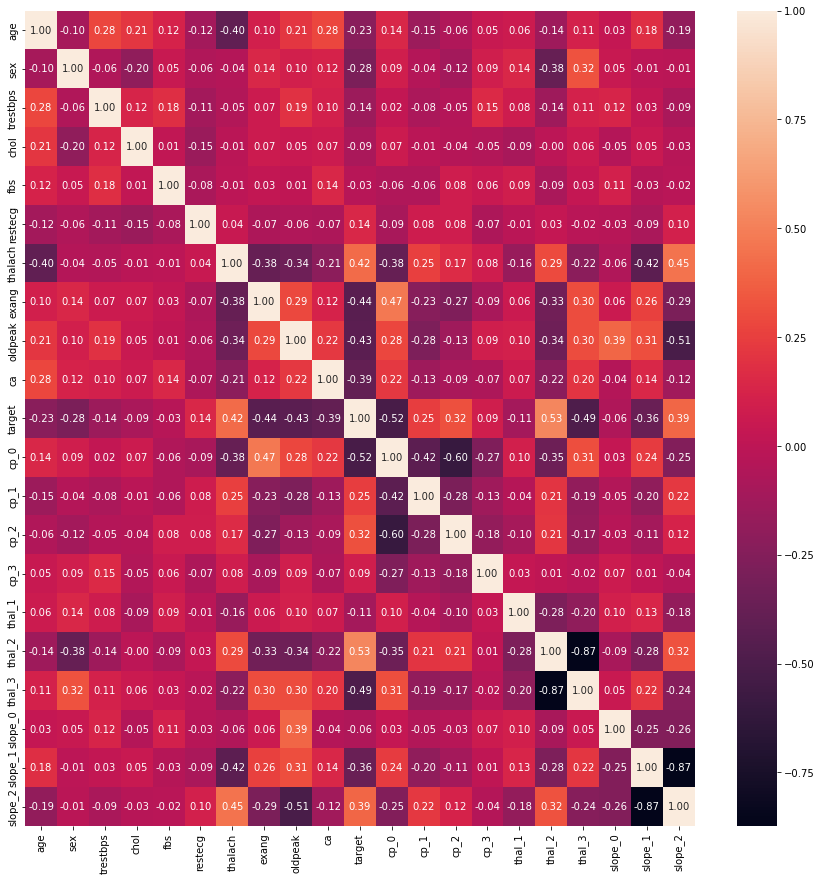

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

### Relationship Visualization

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

### Age and Gender Analysis

C:\Users\farde\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='age', ylabel='Frequency'>

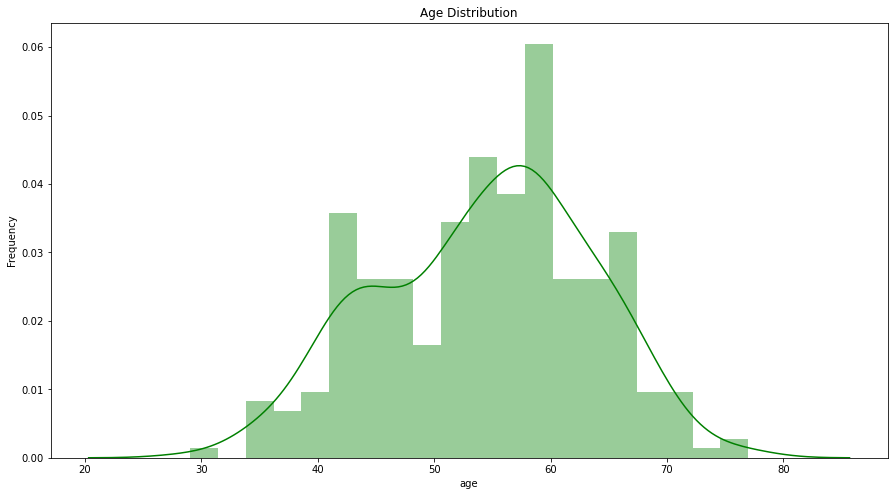

In [8]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution')
plt.ylabel('Frequency')
sns.distplot(df['age'],color='g',bins=20)

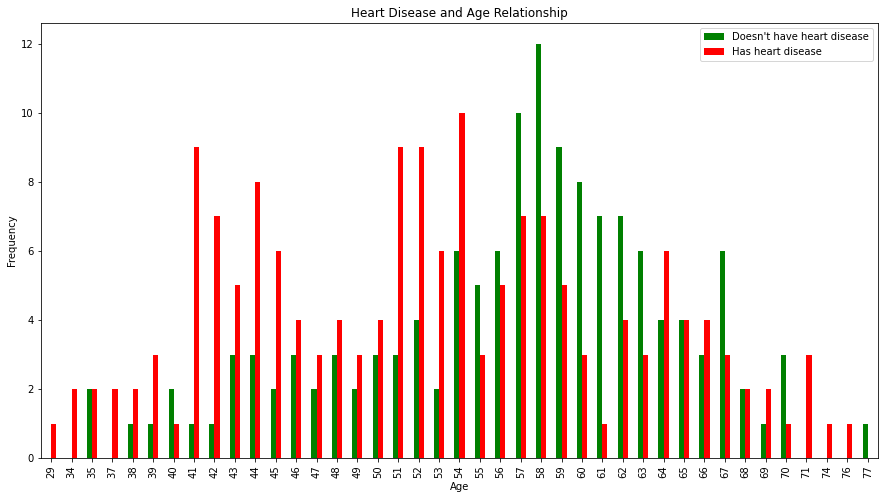

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,8), color=['g','r' ])
plt.title('Heart Disease and Age Relationship')
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

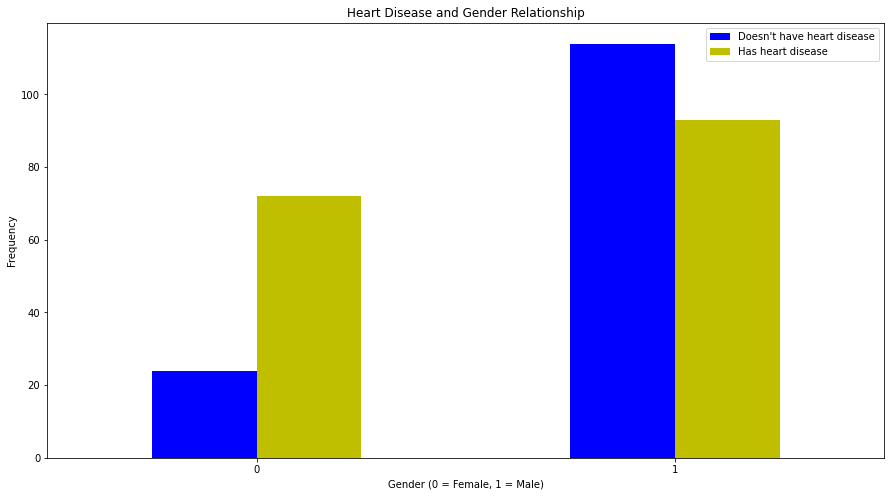

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,8), color=['b','y'])
plt.title('Heart Disease and Gender Relationship')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.ylabel('Frequency')
plt.show()

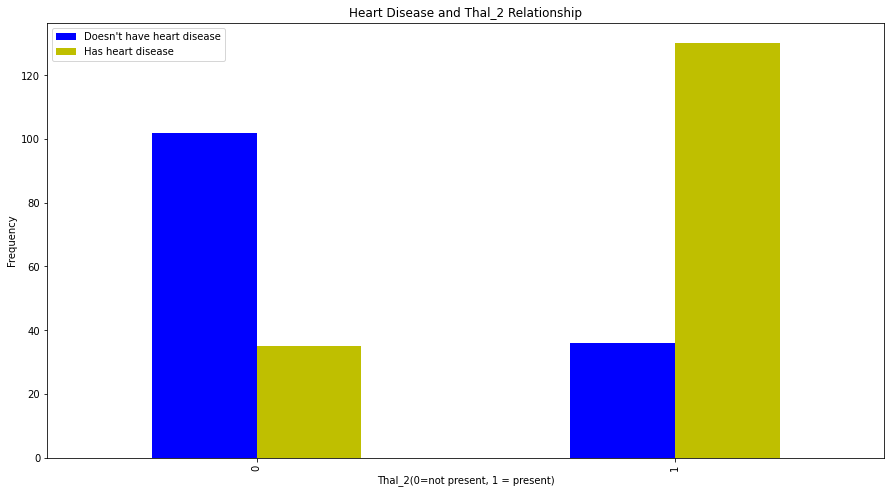

In [11]:
pd.crosstab(df.thal_2,df.target).plot(kind="bar",figsize=(15,8), color=['b','y' ])
plt.title('Heart Disease and Thal_2 Relationship')
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.xlabel('Thal_2(0=not present, 1 = present)')
plt.ylabel('Frequency')
plt.show()

### Normalize Data

In [12]:
x_data = df.drop(['target'], axis=1)

# normalization
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
y = df['target']
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Model Selection

**NOTE:** Since this is a medical problem, we need to avoid false negatives as much as possible(they are deadly!). So **recall** is really important for this situation.

### Support Vector Machines

The objective of the support vector machine algorithm is to find a hyperplane in space that distinctly classifies the data points.

![Support Vector Machines](images/svm.png)

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

svc=SVC(kernel= 'rbf', gamma = 0.30 ,random_state=0)
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)

# storing recall_score for later comparision
svm_recall = round(recall_score(y_test,svm_pred,average='weighted'),3)

print (classification_report(y_test, svm_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
acc = accuracy_score(y_test, svm_pred)
print ("Accuracy: %.3f" % acc)

              precision    recall  f1-score   support

           0      0.885     0.852     0.868        27
           1      0.886     0.912     0.899        34

    accuracy                          0.885        61
   macro avg      0.885     0.882     0.883        61
weighted avg      0.885     0.885     0.885        61

Accuracy: 0.885


#### Confusion Matrix

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known.

![Confusion Matrix](images/confusion_matrix.png)

C:\Users\farde\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


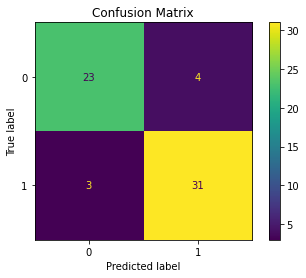

In [15]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(svc, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()

We can calculate **recall** manually looking at the table. For recall: TP / (TP + FN) -> 23 / (23 + 3) = **0.885**  
We already calculated recall using sklearn's recal_score() method. 

#### <span style="color:blue">Recall score with SVM is: 0.885 </span>

### ROC Curve

ROC is a probability curve and AUC(area under the curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
![ROC Curve](images/roccurve.png)


**TPR:**
![TPR](images/tpr.png)

**Specificity:**
![Specificity](images/specificity.png)


**FPR:**
![FPR](images/fpr.png)

gamma = 0.01  accuracy = 0.87   AUC = 0.92
gamma = 0.1  accuracy = 0.87   AUC = 0.93
gamma = 0.2  accuracy = 0.87   AUC = 0.94
gamma = 0.3  accuracy = 0.89   AUC = 0.94
gamma = 0.4  accuracy = 0.87   AUC = 0.93
gamma = 0.5  accuracy = 0.87   AUC = 0.93


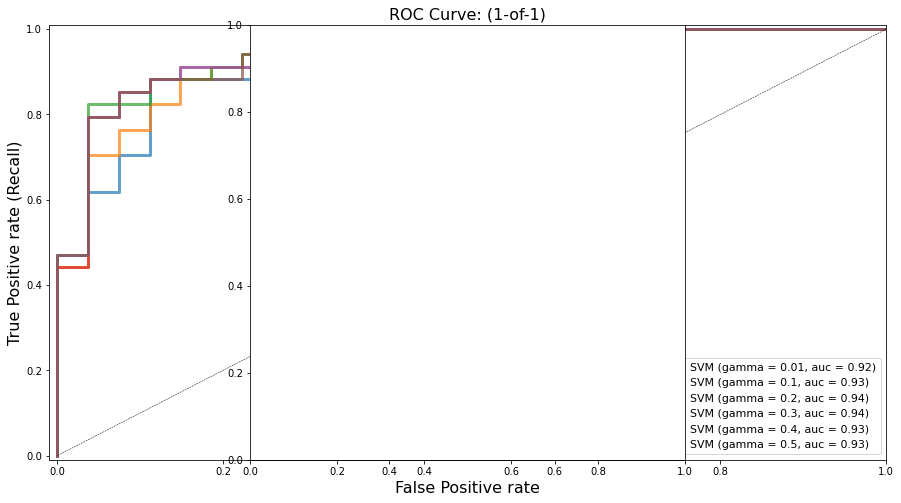

In [16]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (15,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 0.30, 0.40, 0.50]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {}, auc = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive rate', fontsize=16)
plt.ylabel('True Positive rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC Curve: (1-of-1)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### K-Nearest Neighbors

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity by calculating the distance between points on a graph.  
![KNN](images/knn.png)


              precision    recall  f1-score   support

           0      0.857     0.889     0.873        27
           1      0.909     0.882     0.896        34

    accuracy                          0.885        61
   macro avg      0.883     0.886     0.884        61
weighted avg      0.886     0.885     0.885        61

Accuracy: 0.885


C:\Users\farde\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


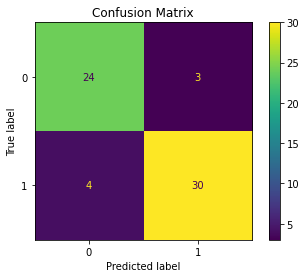

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# storing recall_score for later comparision
knn_recall = round(recall_score(y_test,knn_pred,average='weighted'),3)

print (classification_report(y_test, knn_pred, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, knn_pred))

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [25]:
knn_recall

0.885

### Decision Trees

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

![Decision Trees](images/decision_tree.png)

In [18]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# predict the target on the test dataset
tree_predict_test = tree.predict(X_test)

tree_recall = round(recall_score(y_test, tree_predict_test, average='weighted'),3)

#### Feature Importances

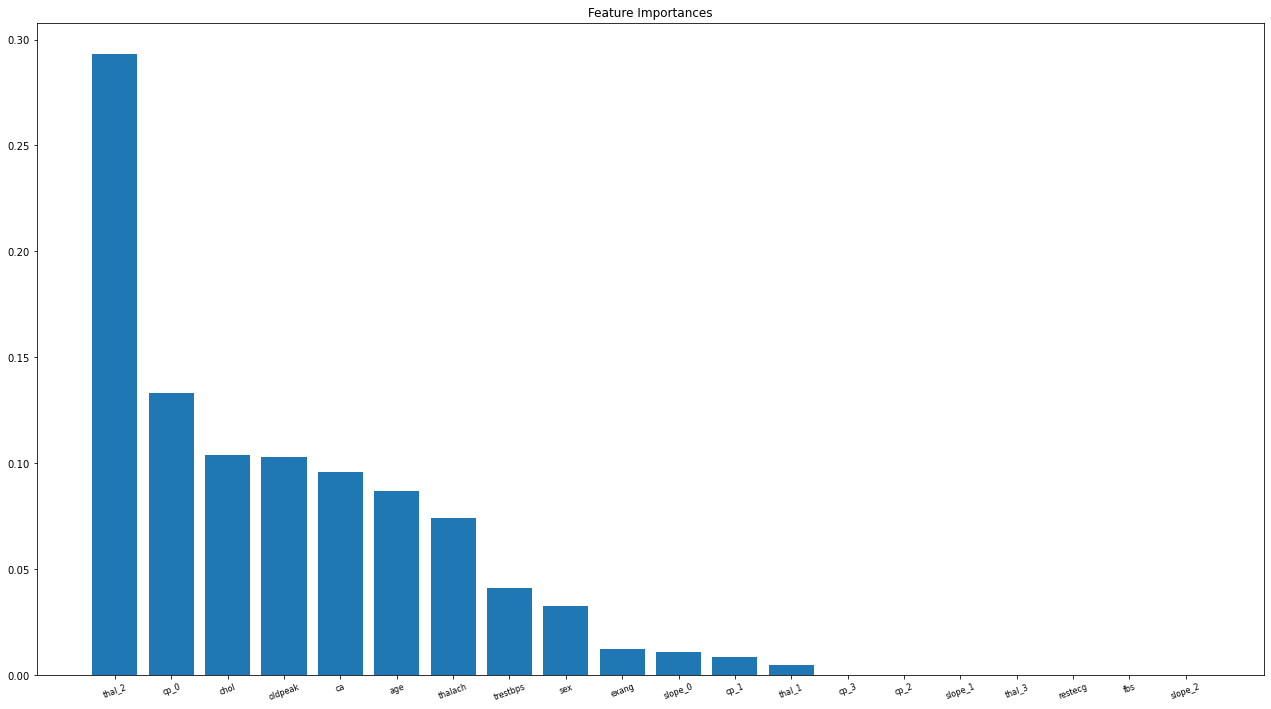

In [19]:
# Calculate feature importances
importances = tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (22,12))
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importances")
# Show plot
plt.show()

**NOTE:** According to the bar plot above, having thalessemia fixed defect is determiner factor whether a person has a heart disease or not. This research also support this finding:  

*'All patients with fixed defects had significant coronary artery disease.'*
https://www.ncbi.nlm.nih.gov/pubmed/18693590

              precision    recall  f1-score   support

           0      0.750     0.778     0.764        27
           1      0.818     0.794     0.806        34

    accuracy                          0.787        61
   macro avg      0.784     0.786     0.785        61
weighted avg      0.788     0.787     0.787        61



C:\Users\farde\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


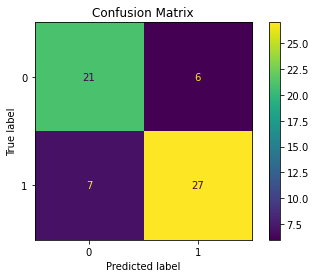

In [20]:
print (classification_report(y_test, tree_predict_test, labels=None, target_names=None, sample_weight=None, digits=3, output_dict=False))

# confusion matrix
disp = plot_confusion_matrix(tree, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()

### Comparision of Models

In [21]:
recall_dict = {'SVM':svm_recall,
               'KNN': knn_recall,
               'Decision Trees': tree_recall
               }
pr_df = pd.DataFrame(recall_dict,index=['Recall Score'])
pr_df

,SVM,KNN,Decision Trees
Recall Score,0.885,0.885,0.787


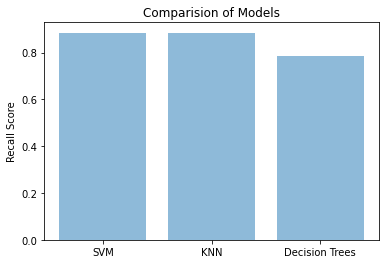

In [22]:
y_pos = np.arange(len(recall_dict))
plt.bar(y_pos, recall_dict.values(), align='center', alpha=0.5)
plt.xticks(y_pos, recall_dict.keys())
plt.ylabel('Recall Score')
plt.title('Comparision of Models')

plt.show()